1.Import Libraries

In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


2.Load the Dataset

In [4]:
from google.colab import files
uploaded = files.upload()
file_name = next(iter(uploaded))
# Read CSV into pandas DataFrame named netflix_df
netflix_df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving Netflix Dataset 1.csv to Netflix Dataset 1 (1).csv


3. Initial Data Exploration

In [5]:
print("Dataset Shape:", netflix_df.shape)
print("\nColumn Names:\n", netflix_df.columns)
print("\nDataset Preview:\n")
display(netflix_df.head())

Dataset Shape: (7789, 11)

Column Names:
 Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

Dataset Preview:



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


4. Data Cleaning

In [7]:
# Check for null values
print("\nMissing Values:\n")
print(netflix_df.isnull().sum())

# Drop duplicates if any
netflix_df.drop_duplicates(inplace=True)

# Fill missing values where applicable
netflix_df['Country'].fillna("Unknown", inplace=True)
netflix_df['Rating'].fillna("Not Rated", inplace=True)
netflix_df['Duration'].fillna("Unknown", inplace=True)



Missing Values:

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


/tmp/ipython-input-2822405563.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df['Country'].fillna("Unknown", inplace=True)
/tmp/ipython-input-2822405563.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

5. Movies vs TV Shows Distribution

Category
Movie      5377
TV Show    2410
Name: count, dtype: int64
Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


/tmp/ipython-input-1702661139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, x='Category', palette='viridis')


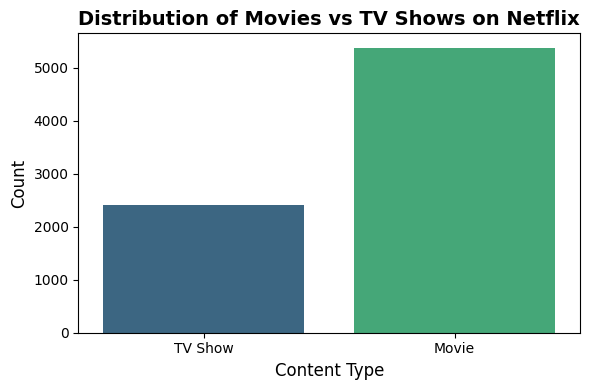

In [15]:
print(netflix_df['Category'].value_counts())
print(netflix_df.columns)

plt.figure(figsize=(6,4))
sns.countplot(data=netflix_df, x='Category', palette='viridis')

plt.title('Distribution of Movies vs TV Shows on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels and clean layout
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


6. Content Added Over the Years

['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'year_added']
Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description',
       'year_added'],
      dtype='object')


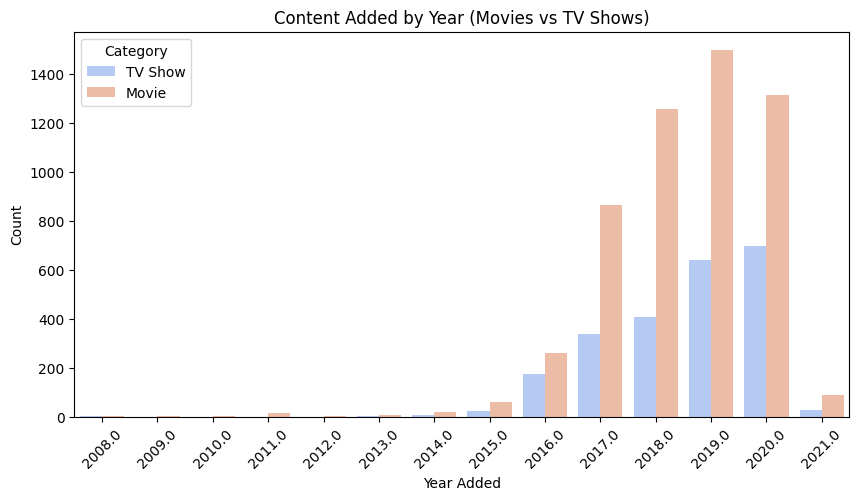

In [25]:
print(netflix_df.columns.tolist())
print(netflix_df.columns)  # Optional: just to verify column names

# Convert 'Release_Date' to datetime, safely handling errors
netflix_df['Release_Date'] = pd.to_datetime(netflix_df['Release_Date'], errors='coerce')

# Extract year, skipping any rows with missing dates
netflix_df['year_added'] = netflix_df['Release_Date'].dt.year

# Drop rows where year is missing
netflix_df_clean = netflix_df.dropna(subset=['year_added', 'Category'])

# Plot the content added by year
plt.figure(figsize=(10,5))
sns.countplot(data=netflix_df_clean, x='year_added', hue='Category', palette='coolwarm')
plt.title('Content Added by Year (Movies vs TV Shows)')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.show()



7. Top 10 Genres

/tmp/ipython-input-3527140156.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')


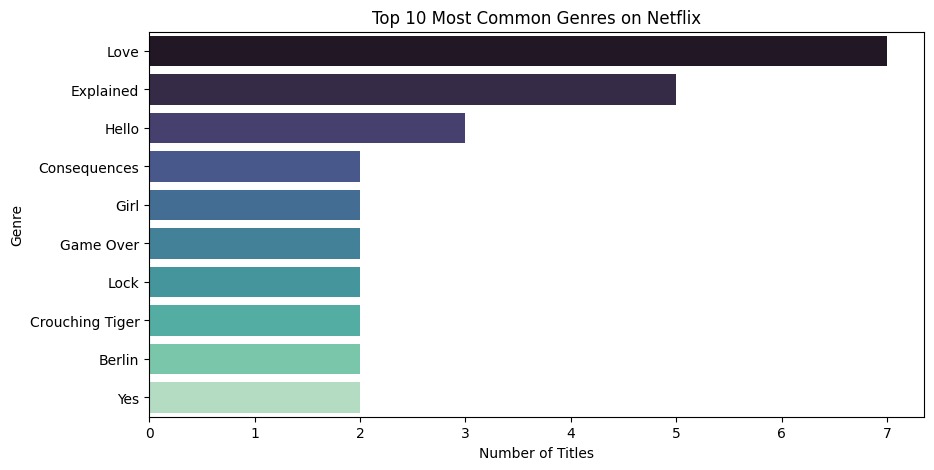

In [30]:
# Split multiple genres and count
genres = netflix_df['Title'].dropna().str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

8. Country-wise Content Contribution

/tmp/ipython-input-780241580.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')


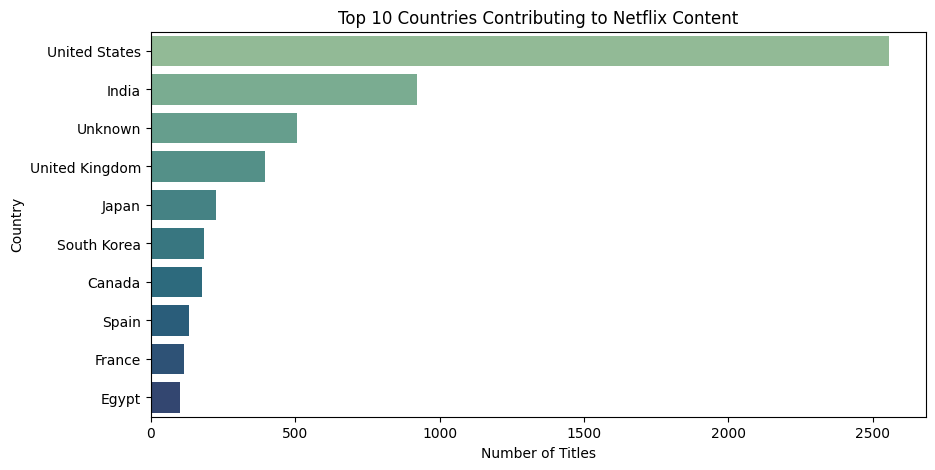

In [32]:
top_countries = netflix_df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title('Top 10 Countries Contributing to Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()